# Sympy Solver

## CHE 341

This notebook introduces SymPy, the Python package for symbolic mathematics. First, let's import everything and set up a nice solve function:

In [1]:
import sympy as sm
sm.init_printing()
import numpy as np
from copy import copy
import matplotlib.pyplot as plt
from sympy.abc import *

def solve(equation, variable, subs=None, unwrap=True):
    """Solve equation for the given variable; if given, a dictionary of subs
    (substitutions) can be given. This is useful if you want to solve numerically
    rather than symbolically. 
    
    Parameters:
    equation : the sympy equation to solve
    variable : the sympy variable to solve for
    subs : the dictionary of substitutions
    unwrap : if there is only one solution, return it directly rather than returning a list.
    
    Returns:
    The solution (if one solution and unwrap=True), or a list of all possible solutions.
    
    Examples: Jupyter notebooks will give prettier printing of the output
    >>> solve(a*x**2 + b*x + c, x)
        [(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]
        
    """
    if subs is not None:
        subs = copy(subs)
        subs.pop(variable.name, None)
        out = sm.solve(equation.subs(subs), variable)
    else:
        out = sm.solve(equation, variable)
    if unwrap and len(out) == 1:
        out = out[0]
    return out

All capital and lowercase single letter variables (`a, b, c, A, B, C`) and Greek letters (`alpha, beta, gamma`) are defined as Sympy variables by default because of the line `from sympy.abc import *`.

For example, below we solve the quadratic equation for $x$:

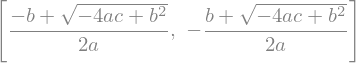

In [2]:
solns = solve(a*x**2 + b*x+c, x)
solns

Here's another example, solving the Boltzmann equation for $T$. In order to use the normal variables, we define $n_i$, $n_j$, and $k_B$ first:

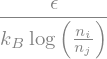

In [3]:
n_i, n_j, k_B = sm.symbols("n_i n_j k_B", positive=True) # Define the 3 symbols with subscripts in the Boltzmann equation

boltzmann_eqn = n_j/n_i-sm.exp(-epsilon/(k_B*T)) # We use sympy's exponential function, sm.exp
solve(boltzmann_eqn, T)

One final example - let's do an integral? 

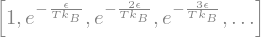

In [4]:
sm.sequence(sm.exp(-epsilon*i/(k_B*T)), (i, 0, 5))

In [5]:
epsilon, T = sm.symbols('epsilon T', positive=True)

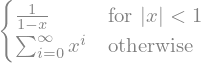

In [6]:
sm.Sum(x**i, (i, 0, sm.oo)).doit()

In [7]:
subs=dict(
P = 1.0,
R = 0.08206,
T = 298,
n = 1,
V=22.4)
equation = P*V-n*R*T
solve(equation, V, subs)

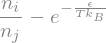

In [8]:
n_i, n_j, k_B = sm.symbols("n_i n_j k_B")

# The sympy solver!
subs=dict(
n_i=0.5,
n_j=1,
epsilon=1e-21,
k_B=1.381e-23,
T=298)
boltzmann = n_i/n_j-sm.exp(-epsilon/(k_B*T))
boltzmann


In [9]:
solve(boltzmann, n_i, subs)

In [10]:
# Let's 
solve(boltzmann, T)`

SyntaxError: invalid syntax (3253579453.py, line 2)

In [ ]:
solve(boltzmann, epsilon)

In [ ]:
rotational_energy_eqn = i*(i+1) * h**2/(8 * pi**2) * (1/(mu*R**2)) - epsilon
rotational_energy_eqn

In [ ]:
solve(rotational_energy_eqn, R)[1]

In [ ]:
!pip install pint

In [ ]:
import pint
u = pint.UnitRegistry()

In [ ]:
(u.h * 1.0).to('J s')

In [ ]:
def reduced_mass(m1, m2):
    return m1 * m2 / (m1 + m2)

In [ ]:
mu_CO = reduced_mass(12, 16)*u.amu

In [ ]:
mu_CO

In [ ]:
def boltzmann_ni(nj, energy, T):
    return nj*np.exp(-energy/ (T*1.381e-23))

In [ ]:
temps = np.linspace(100, 300, 5)
temps

In [ ]:
boltzmann_ni(1, 1e-21, temps)

What if I need to do this for many values of temperature? Make a new function!

In [ ]:
def boltzmann_n_i_temp(T, subs):
    subs = copy(subs)
    # The sympy solver!
    subs['T'] = T
    boltzmann = n_i/n_j-sm.exp(-epsilon/(k_B*T))
    return solve(boltzmann, n_i, subs)

In [ ]:
temps = np.linspace(10, 300,30)
pops = [boltzmann_n_i_temp(t, subs) for t in temps]

In [ ]:
plt.plot(temps, pops, 'o')

In [ ]:
# subs is a dictionary of substitutions - variables and their values...
subs=dict(
P = , # atm
R = 0.08206, # L atm/mol-K
T = 293, # K
n = 9.32, # mol
V= # L
)
gas_law = P*V-n*R*T
solve(gas_law, V, subs) #

n_i_func(1, 1e-21, 1.381e-23, 343)